## Machine Learning HW4
Gaumart Siméon . 0845209

# Problem 1

In [1]:
#Code to import mnist data written by Eric Liu

import numpy as np
import os
import gzip
import struct
from six.moves import urllib
import operator
from datetime import datetime

def _read32(bytestream):
    dt = np.dtype(np.uint32).newbyteorder('>')    #  讀 32位元, 編碼模式為 Big5('>')
    return np.frombuffer(bytestream.read(4), dtype=dt)[0]  # 讀前 4個字

def extract_images_train(input_file, is_value_binary, is_matrix, num):
    with gzip.open(input_file, 'rb') as zipf:
        magic = _read32(zipf)  #2051
        if magic !=2051:
            raise ValueError('Invalid magic number %d in MNIST image file: %s' %(magic, input_file.name))
        num_images = _read32(zipf)
        num_images = num
        rows = _read32(zipf)
        cols = _read32(zipf)
        #print(magic, num_images, rows, cols)
        print(num_images, rows, cols)
        buf = zipf.read(rows * cols * num_images)
        data = np.frombuffer(buf, dtype=np.uint8)
        if is_matrix:
            data = data.reshape(num_images, rows*cols)
        else:
            data = data.reshape(num_images, rows, cols)
        if is_value_binary:
            return np.minimum(data, 1)
        else:
            return data
def extract_images_test(input_file, is_value_binary, is_matrix, num):
    with gzip.open(input_file, 'rb') as zipf:
        magic = _read32(zipf)  #2051
        if magic !=2051:
            raise ValueError('Invalid magic number %d in MNIST image file: %s' %(magic, input_file.name))
        num_images = _read32(zipf)
        num_images = num
        rows = _read32(zipf)
        cols = _read32(zipf)
        #print(magic, num_images, rows, cols)
        print(num_images, rows, cols)
        buf = zipf.read(rows * cols * num_images)
        data = np.frombuffer(buf, dtype=np.uint8)
        if is_matrix:
            data = data.reshape(num_images, rows*cols)
        else:
            data = data.reshape(num_images, rows, cols)
        if is_value_binary:
            return np.minimum(data, 1)
        else:
            return data

def extract_labels(input_file):
    with gzip.open(input_file, 'rb') as zipf:
        magic = _read32(zipf)
        if magic != 2049:
            raise ValueError('Invalid magic number %d in MNIST label file: %s' % (magic, input_file.name))
        num_items = _read32(zipf)
        buf = zipf.read(num_items)
        labels = np.frombuffer(buf, dtype=np.uint8)
        return labels



In [2]:

X_train = extract_images_train('train-images-idx3-ubyte.gz', True, True, 60000)
train_labels = extract_labels('train-labels-idx1-ubyte.gz')
X_test = extract_images_test('t10k-images-idx3-ubyte.gz' , True, True, 10000)
test_labels = extract_labels('t10k-labels-idx1-ubyte.gz')

print(X_train.shape)
print(train_labels.shape)
print(X_test.shape)
print(test_labels.shape)

60000 28 28
10000 28 28
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np

kmeans = KMeans(n_clusters=len(np.unique(train_labels))).fit(X_train)

print("\nSCORE KMEAN 784 FEATURES")
print("Completeness Score : {}".format(metrics.completeness_score(train_labels,kmeans.labels_)))
print("Homogeneity Score : {}\n".format(metrics.homogeneity_score(train_labels, kmeans.labels_)))


SCORE KMEAN 784 FEATURES
Completeness Score : 0.5030827561323296
Homogeneity Score : 0.49893304813274403



Automatically created module for IPython interactive environment
(60000, 784)
(60000,)
(60000, 784)

SCORE KMEAN 2 FEATURES
Completeness Score : 0.3410022025358123
Homogeneity Score : 0.3393814171166456

z:(728, 851)


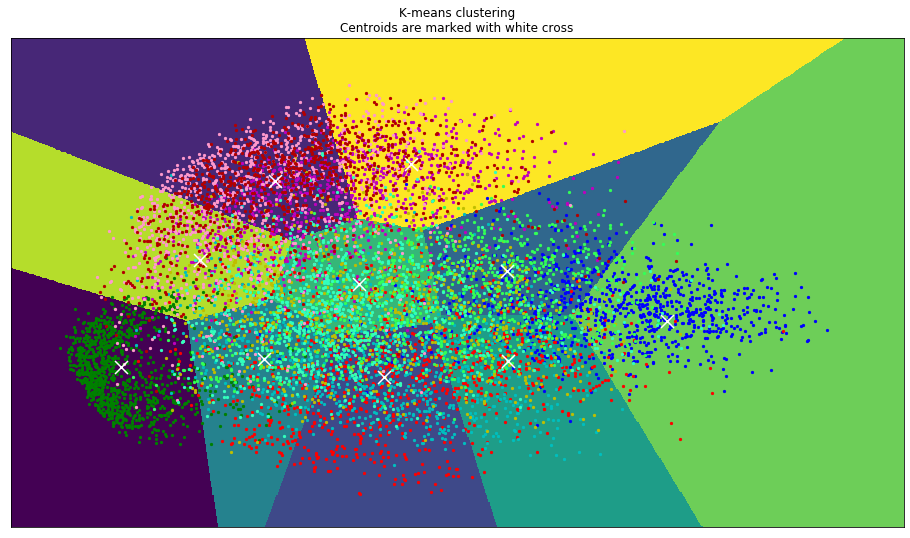

In [61]:
%matplotlib inline
plt.rcParams['figure.figsize']=(16,9)
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X_digits, y_digits = X_train, train_labels
#data = scale(X_digits)
#data_test=scale(X_test)
data = X_digits
data_test= X_test

#print(X_digits.shape)
#print(y_digits.shape)
#print(data.shape)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits





# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)
reduced_data_test=PCA(n_components=2).fit_transform(data_test)

print("\nSCORE KMEAN 2 FEATURES")
print("Completeness Score : {}".format(metrics.completeness_score(labels,kmeans.labels_)))
print("Homogeneity Score : {}\n".format(metrics.homogeneity_score(labels, kmeans.labels_)))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
print("z:"+str(Z.shape))
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           #cmap=plt.cm.Paired,
           #cmap='gray',
           aspect='auto', 
           origin='lower')

test=list(np.zeros(1*10))
XX=PCA(n_components=2).fit_transform(data_test)
for i in range(10):
    test[i]=XX[np.where(test_labels==i)]
    
colors = ['b', 'g', 'r', 'c', 'm', 'y', '#33FF57', '#ff99cc','#33FFBD', '#b30000']
for i in range(10):
    plt.scatter(test[i][:,0],test[i][:,1],color=colors[i],s=5)

#plt.plot(reduced_data_test[:, 0], reduced_data_test[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Problem 2

four8.jpg not found
four9.jpg not found
four75.jpg not found
four76.jpg not found
four77.jpg not found
four78.jpg not found
four79.jpg not found
four80.jpg not found
four81.jpg not found
four82.jpg not found
four83.jpg not found
four84.jpg not found
four85.jpg not found
four86.jpg not found
four87.jpg not found
four88.jpg not found
four89.jpg not found
four90.jpg not found
four91.jpg not found
four92.jpg not found
four93.jpg not found
four94.jpg not found
four95.jpg not found
four96.jpg not found
four97.jpg not found
four98.jpg not found
four99.jpg not found
(713, 28, 28)


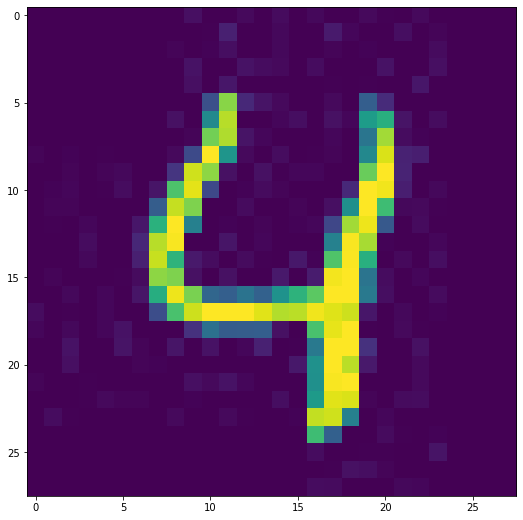

In [91]:
from matplotlib.pyplot import imread,imshow
import numpy as np

im=np.zeros((713,28,28))
k=0
for i in range(0,740):
    try:
        im[k]=imread("./pca_dataset/four"+str(i)+".jpg")
        k+=1
    except:
        print("four"+str(i)+".jpg not found")
        
print(im.shape)
imshow(im[0])

In [92]:
img=im.reshape((im.shape[0], im.shape[1] * im.shape[2]))
print(img.shape)

(713, 784)


In [93]:
import numpy as np
def PCA_basic(matrix,nb):
    #1
    X=matrix
    m=X.shape[1]
    #2
    Xmean=np.mean(X,axis=0)
    Xc=X-Xmean
    #3
    Xct=np.transpose(Xc)
    Mcov=(1./m)*Xct.dot(Xc)
    #4
    eig_val,eig_vec=np.linalg.eig(Mcov)
    
    eig_val=eig_val.real
    eig_vec=eig_vec.real
    #5
    index=[]
    min=eig_val[0]
    for i in range(0,len(eig_val)):
        if min>eig_val[i]:
            min=eig_val[i]
    for j in range(0,nb):
        max=min
        k=0
        for i in range(0,len(eig_val)):
            if eig_val[i]>max:
                k=i
                max=eig_val[i]
        eig_val[k]=min-1
        index.append(k)
    res=np.zeros((eig_vec.shape[0],len(index)))
    for i in range(0,len(index)):
        res[:,i]=eig_vec[:,index[i]]
    res2=X.dot(res)
    return -res,-res2
    

# (a)

EIGEN VECTORS FOR DIMENSION REDUCED TO 2


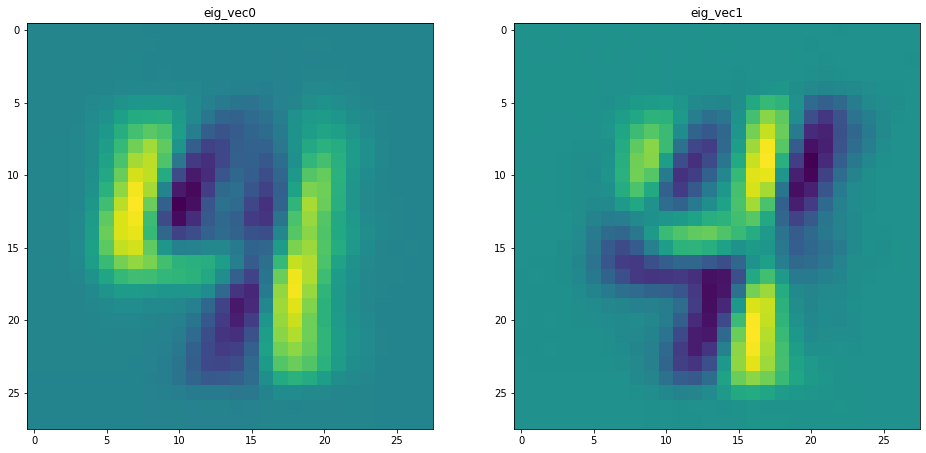

In [94]:
import matplotlib.pyplot as plt
import numpy as np
eig2,img2=PCA_basic(img,2)
print("EIGEN VECTORS FOR DIMENSION REDUCED TO 2")
plt.subplot(1,2,1)
plt.title("eig_vec0")
plt.imshow(np.transpose(eig2)[0].reshape(28,28))
plt.subplot(1,2,2)
plt.title("eig_vec1")
plt.imshow(np.transpose(eig2)[1].reshape(28,28))

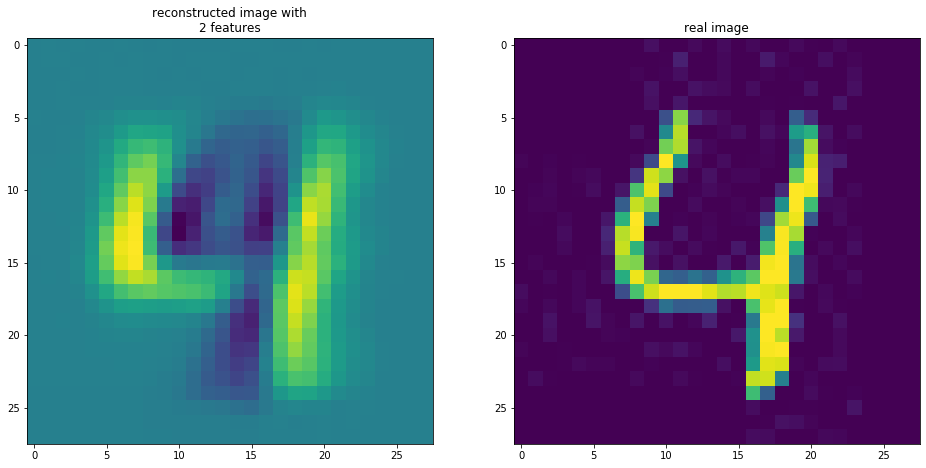

In [95]:
#IMAGE DIMENSION REDUCED TO 2
import matplotlib.pyplot as plt
import numpy as np
n=0
k=2
eig,img_=PCA_basic(img,k)
imgk=img_.dot(np.transpose(eig))
plt.subplot(1,2,1)
plt.title("reconstructed image with\n"+str(k)+" features")
plt.imshow(imgk[n].reshape(28,28))
plt.subplot(1,2,2)
plt.title("real image")
plt.imshow(img[n].reshape(28,28))

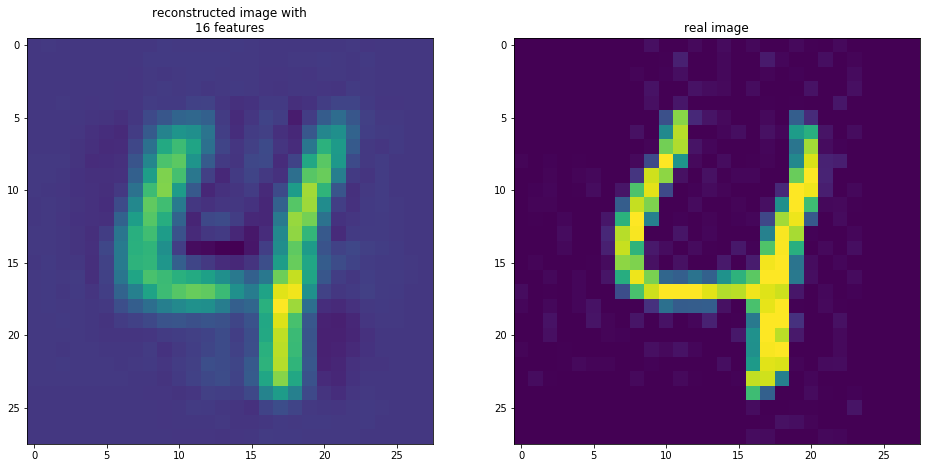

In [96]:
#IMAGE DIMENSION REDUCED TO 16
import matplotlib.pyplot as plt
import numpy as np
n=0
k=16
eig,img_=PCA_basic(img,k)
imgk=img_.dot(np.transpose(eig))
plt.subplot(1,2,1)
plt.title("reconstructed image with\n"+str(k)+" features")
plt.imshow(imgk[n].reshape(28,28))
plt.subplot(1,2,2)
plt.title("real image")
plt.imshow(img[n].reshape(28,28))

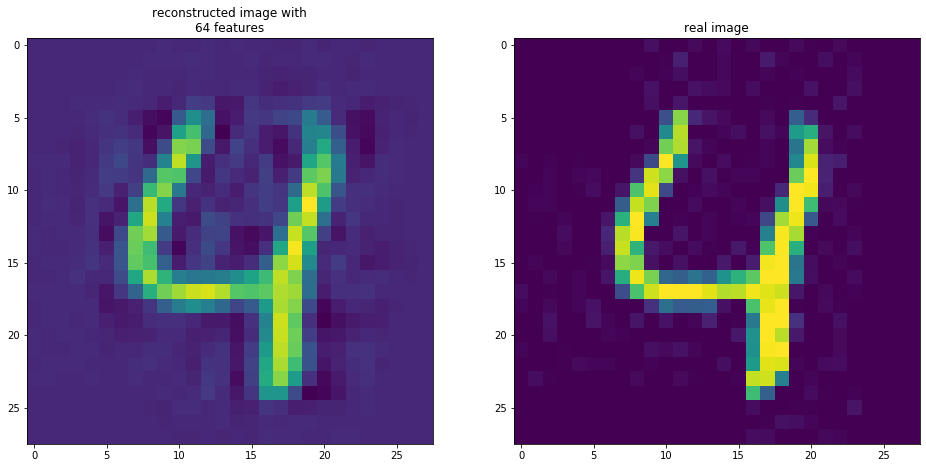

In [97]:
#IMAGE DIMENSION REDUCED TO 64
import matplotlib.pyplot as plt
import numpy as np
n=0
k=64
eig,img_=PCA_basic(img,k)
imgk=img_.dot(np.transpose(eig))
plt.subplot(1,2,1)
plt.title("reconstructed image with\n"+str(k)+" features")
plt.imshow(imgk[n].reshape(28,28))
plt.subplot(1,2,2)
plt.title("real image")
plt.imshow(img[n].reshape(28,28))

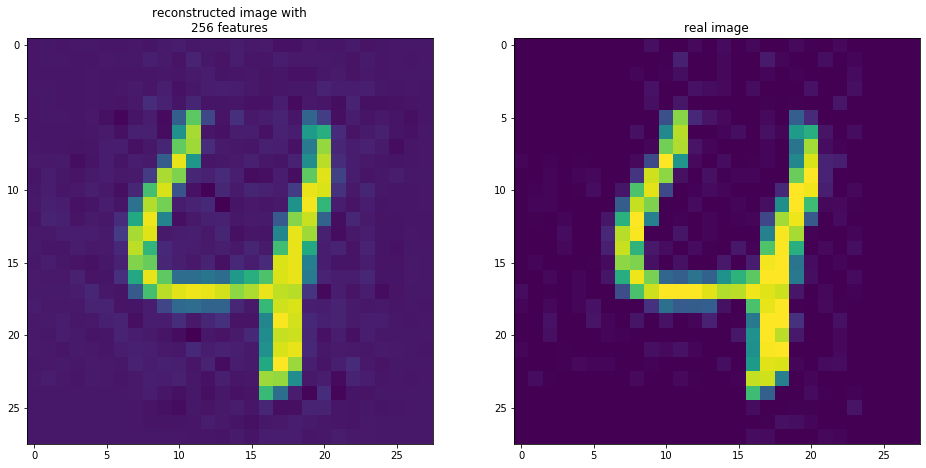

In [98]:
#IMAGE DIMENSION REDUCED TO 256
import matplotlib.pyplot as plt
import numpy as np
n=0
k=256
eig,img_=PCA_basic(img,k)
imgl=img_.dot(np.transpose(eig))
plt.subplot(1,2,1)
plt.title("reconstructed image with\n"+str(k)+" features")
plt.imshow(imgl[n].reshape(28,28))
plt.subplot(1,2,2)
plt.title("real image")
plt.imshow(img[n].reshape(28,28))

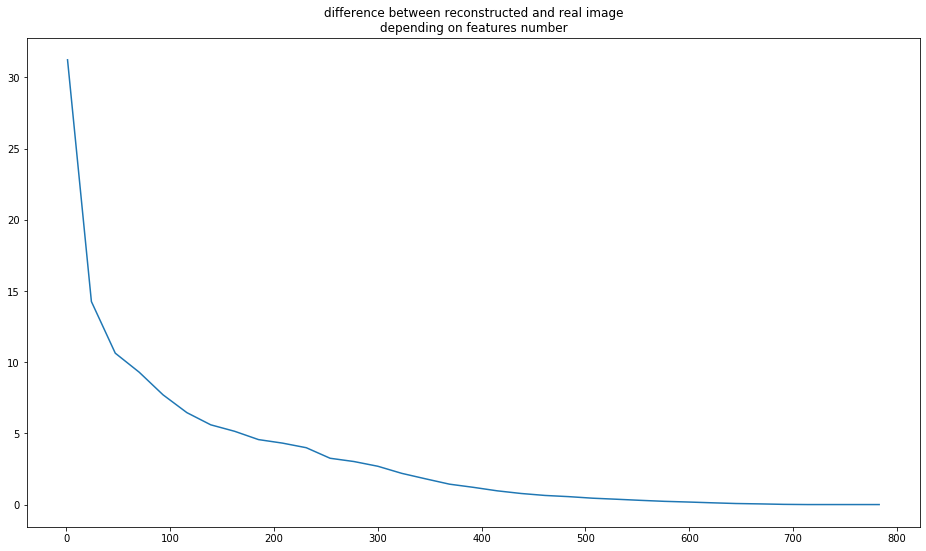

In [99]:
import numpy as np
import matplotlib.pyplot as plt

def _error_(img1,img2):
    """my own way to calculate difference between two matrix (images) with same shape. 
    If _error_(a,b)==0 -> a==b """
    e=abs(img1-img2)
    error=np.sum(e)/(len(e.reshape(-1)))
    return error
    
error=[]
k=[]
n=0
for i in range(1,784,23):
    k.append(i)
    eig,img_=PCA_basic(img,i)
    imgk=img_.dot(np.transpose(eig))
    error.append(_error_(img[n],imgk[n]))

plt.title("difference between reconstructed and real image\ndepending on features number")
plt.plot(k,error)

# (b)

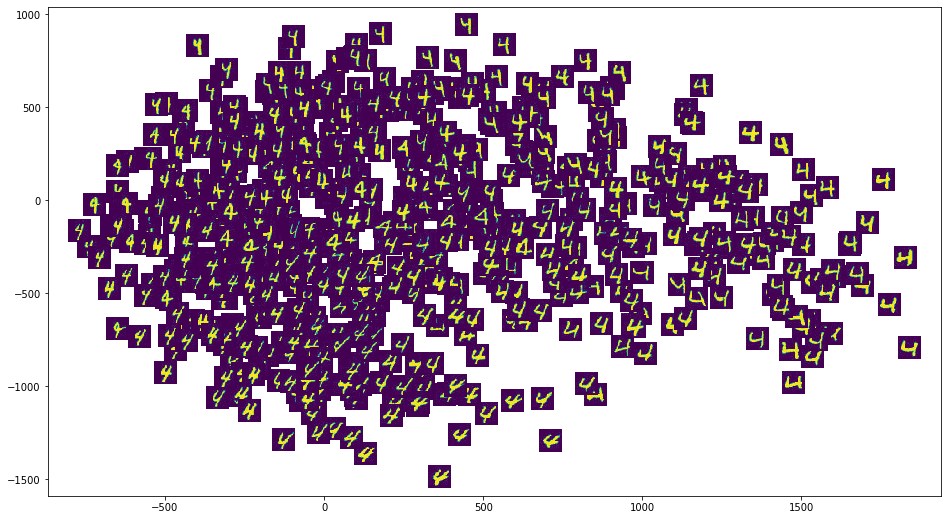

In [101]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

eig,img2=PCA_basic(img,2)

maxx,minx,maxy,miny = np.max(img2[:,0]),np.min(img2[:,0]),np.max(img2[:,1]),np.min(img2[:,1])

ax.set_xlim(minx-100, maxx+100)
ax.set_ylim(miny-100, maxy+100)

for i in range(0,im.shape[0]):
    imagebox = OffsetImage(im[i], zoom=0.8)

    ab = AnnotationBbox(imagebox, (img2[i,0], img2[i,1]), frameon=False)

    ax.add_artist(ab)


plt.show()